In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Angola_df = pd.read_csv('../SEARS/ANGOLA.csv')

In [4]:
Angola_df.head()

,Date,USD,Unnamed: 2,Date.1,GBP,Unnamed: 5,Date.2,EUR
0,6 Jan 2004,79.01866,NaN,6 Jan 2004,140.84286,NaN,6 Jan 2004,99.68994
1,7 Jan 2004,78.87716,NaN,7 Jan 2004,143.36713,NaN,7 Jan 2004,100.33175
2,8 Jan 2004,78.84478,NaN,8 Jan 2004,143.09539,NaN,8 Jan 2004,99.77018
3,9 Jan 2004,78.90775,NaN,9 Jan 2004,143.27280,NaN,9 Jan 2004,99.38431
4,12 Jan 2004,78.92975,NaN,12 Jan 2004,144.73348,NaN,12 Jan 2004,100.50125


In [5]:
Angola_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4825 entries, 0 to 4824
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        4825 non-null   object 
 1   USD         4823 non-null   float64
 2   Unnamed: 2  0 non-null      float64
 3   Date.1      4760 non-null   object 
 4   GBP         4756 non-null   float64
 5   Unnamed: 5  0 non-null      float64
 6   Date.2      4764 non-null   object 
 7   EUR         4760 non-null   float64
dtypes: float64(5), object(3)
memory usage: 301.7+ KB


In [6]:
Angola_df= Angola_df.drop(columns=['Unnamed: 5','Unnamed: 2'])

In [7]:
Angola_df.head()

,Date,USD,Date.1,GBP,Date.2,EUR
0,6 Jan 2004,79.01866,6 Jan 2004,140.84286,6 Jan 2004,99.68994
1,7 Jan 2004,78.87716,7 Jan 2004,143.36713,7 Jan 2004,100.33175
2,8 Jan 2004,78.84478,8 Jan 2004,143.09539,8 Jan 2004,99.77018
3,9 Jan 2004,78.90775,9 Jan 2004,143.27280,9 Jan 2004,99.38431
4,12 Jan 2004,78.92975,12 Jan 2004,144.73348,12 Jan 2004,100.50125


In [8]:
Angola_df= Angola_df.rename(columns= {'Date.1': 'Date_GBP',
                                       'Date.2': 'Date_EUR' })

In [9]:
Angola_df['Date'] = pd.to_datetime(Angola_df['Date'])
Angola_df['Date_GBP'] = pd.to_datetime(Angola_df['Date_GBP'])
Angola_df['Date_EUR'] = pd.to_datetime(Angola_df['Date_EUR'])

In [10]:
# Convert to a specific string format (e.g., 'YYYY-MM-DD')
Angola_df['Date'] = Angola_df['Date'].dt.strftime('%Y-%m-%d')
Angola_df['Date_GBP'] = Angola_df['Date_GBP'].dt.strftime('%Y-%m-%d')
Angola_df['Date_EUR'] = Angola_df['Date_EUR'].dt.strftime('%Y-%m-%d')

In [11]:
Angola_df.head()

,Date,USD,Date_GBP,GBP,Date_EUR,EUR
0,2004-01-06,79.01866,2004-01-06,140.84286,2004-01-06,99.68994
1,2004-01-07,78.87716,2004-01-07,143.36713,2004-01-07,100.33175
2,2004-01-08,78.84478,2004-01-08,143.09539,2004-01-08,99.77018
3,2004-01-09,78.90775,2004-01-09,143.27280,2004-01-09,99.38431
4,2004-01-12,78.92975,2004-01-12,144.73348,2004-01-12,100.50125


In [74]:
numeric_columns = Angola_df.select_dtypes(include=['number'])
obj_cols = Angola_df.select_dtypes(include=['object'])


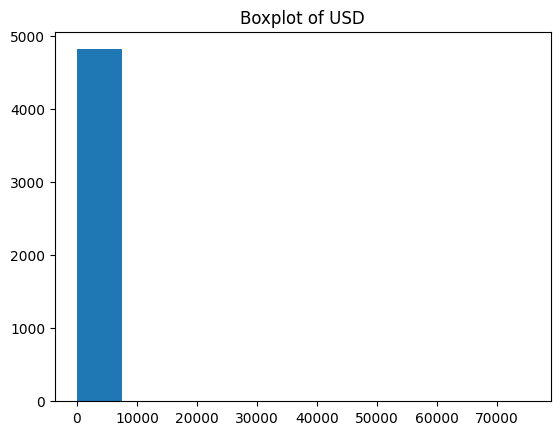

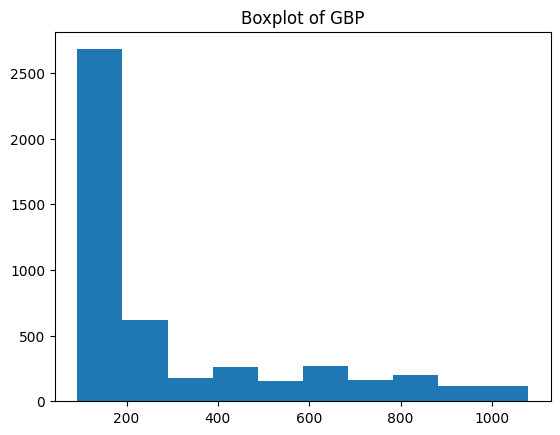

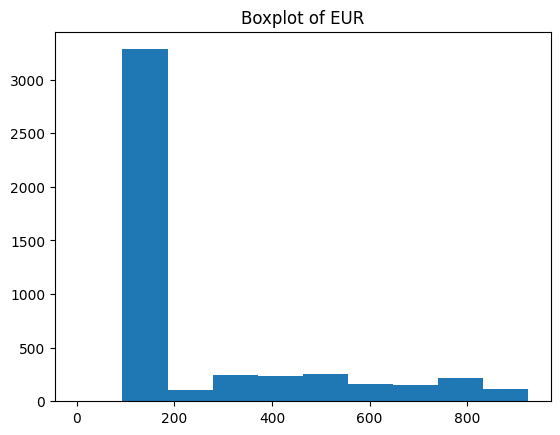

In [79]:
for column in numeric_columns.columns:
    plt.figure()  # Create a new figure for each boxplot
    plt.hist(Angola_df[column])
    plt.title(f'Boxplot of {column}')  # Set the title of the plot
    plt.show()

In [12]:
USD_Angola_df = Angola_df[['Date', 'USD']]
GBP_Angola_df = Angola_df[['Date_GBP', 'GBP']]
EUR_Angola_df = Angola_df[['Date_EUR', 'EUR']]

In [28]:
Currency_df = Angola_df[['Date','USD','Date_GBP','GBP','Date_EUR','EUR']]

### FOR US DOLLAR

In [13]:
# Create a complete date range from Jan 6, 2004, to Nov 30, 2023
date_range = pd.date_range(start='2004-01-06', end='2023-11-30', freq='D')

In [14]:
dates_df = pd.DataFrame(date_range, columns=['Date'])

In [15]:
dates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7269 entries, 0 to 7268
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7269 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 56.9 KB


In [16]:
USD_Angola_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4825 entries, 0 to 4824
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4825 non-null   object 
 1   USD     4823 non-null   float64
dtypes: float64(1), object(1)
memory usage: 75.5+ KB


In [17]:
USD_Angola_df['Date'] = pd.to_datetime(USD_Angola_df['Date'])

C:\Users\damzking\AppData\Local\Temp\ipykernel_20784\3316240419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USD_Angola_df['Date'] = pd.to_datetime(USD_Angola_df['Date'])


In [18]:
Angola_USA_merge_df = pd.merge(dates_df, USD_Angola_df, how='left', on= 'Date')

In [19]:
Angola_USA_merge_df.head()

,Date,USD
0,2004-01-06,79.01866
1,2004-01-07,78.87716
2,2004-01-08,78.84478
3,2004-01-09,78.90775
4,2004-01-10,NaN


### Excluding  WEEKENDS 

In [20]:
Angola_USA_merge_df = Angola_USA_merge_df[~Angola_USA_merge_df['Date'].dt.weekday.isin([5, 6])]

In [21]:
Angola_USA_merge_df

,Date,USD
0,2004-01-06,79.01866
1,2004-01-07,78.87716
2,2004-01-08,78.84478
3,2004-01-09,78.90775
6,2004-01-12,78.92975
...,...,...
7262,2023-11-24,827.71600
7265,2023-11-27,827.71600
7266,2023-11-28,827.79300
7267,2023-11-29,827.79300


In [22]:
Angola_USA_merge_df = Angola_USA_merge_df.set_index('Date')


In [23]:
print(f" There are {Angola_USA_merge_df['USD'].isna().sum()} missing dollars exchange rate during the weekdays")

 There are 389 missing dollars exchange rate during the weekdays


In [24]:
# Perform forward fill and assign it back to the original column
Angola_USA_merge_df['USD'] = Angola_USA_merge_df['USD'].ffill()

In [25]:
Angola_USA_merge_df.head()

,USD
Date,
2004-01-06,79.01866
2004-01-07,78.87716
2004-01-08,78.84478
2004-01-09,78.90775
2004-01-12,78.92975


In [26]:
Year_rate=Angola_USA_merge_df['USD'].sort_index(ascending=True).resample('Y').sum()

C:\Users\damzking\AppData\Local\Temp\ipykernel_20784\3081248523.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  Year_rate=Angola_USA_merge_df['USD'].sort_index(ascending=True).resample('Y').sum()


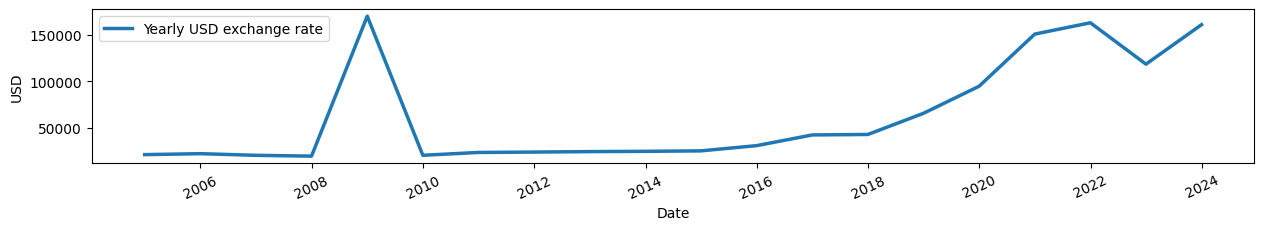

In [27]:
plt.figure(figsize=(15,2))
sns.lineplot(data=Year_rate, linewidth=2.5, label='Yearly USD exchange rate')
plt.xticks(rotation=25)
plt.show()

#### FOR EUROS CURRENCY

In [32]:
EUR_Angola_df['Date_EUR'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4825 entries, 0 to 4824
Series name: Date_EUR
Non-Null Count  Dtype 
--------------  ----- 
4764 non-null   object
dtypes: object(1)
memory usage: 37.8+ KB


In [33]:
EUR_Angola_df['Date_EUR'] = pd.to_datetime(EUR_Angola_df['Date_EUR'])

C:\Users\damzking\AppData\Local\Temp\ipykernel_20784\3274660379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EUR_Angola_df['Date_EUR'] = pd.to_datetime(EUR_Angola_df['Date_EUR'])


In [34]:
# Create a complete date range from Jan 6, 2004, to Nov 30, 2023
date_range = pd.date_range(start='2004-01-06', end='2023-11-30', freq='D')

In [35]:
dates_df = pd.DataFrame(date_range, columns=['Date_EUR'])

In [ ]:
dates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7269 entries, 0 to 7268
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date_EUR  7269 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 56.9 KB


In [ ]:
 EUR_Angola_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4825 entries, 0 to 4824
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date_EUR  4764 non-null   datetime64[ns]
 1   EUR       4760 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 75.5 KB


In [36]:
Angola_EUR_merge_df = pd.merge(dates_df,  EUR_Angola_df, how='left', on= 'Date_EUR')

### EXCLUDING WEEKENDS

In [37]:
Angola_EUR_merge_df = Angola_EUR_merge_df[~Angola_EUR_merge_df['Date_EUR'].dt.weekday.isin([5, 6])]

In [38]:
Angola_EUR_merge_df = Angola_EUR_merge_df.set_index('Date_EUR')

In [82]:
Angola_EUR_merge_df

,EUR
Date_EUR,
2004-01-06,99.68994
2004-01-07,100.33175
2004-01-08,99.77018
2004-01-09,99.38431
2004-01-12,100.50125
...,...
2023-11-24,904.19700
2023-11-27,906.76300
2023-11-28,907.26100


In [39]:
print(f" There are {Angola_EUR_merge_df['EUR'].isna().sum()} missing Euros exchange rate during the weekdays")

 There are 444 missing Euros exchange rate during the weekdays


In [40]:
# Perform forward fill and assign it back to the original column
Angola_EUR_merge_df['EUR'] = Angola_EUR_merge_df['EUR'].ffill()

In [41]:
Angola_EUR_merge_df.head()

,EUR
Date_EUR,
2004-01-06,99.68994
2004-01-07,100.33175
2004-01-08,99.77018
2004-01-09,99.38431
2004-01-12,100.50125


#### FOR POUNDS CURRENCY

In [42]:
GBP_Angola_df['Date_GBP'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4825 entries, 0 to 4824
Series name: Date_GBP
Non-Null Count  Dtype 
--------------  ----- 
4760 non-null   object
dtypes: object(1)
memory usage: 37.8+ KB


In [43]:
GBP_Angola_df['Date_GBP'] = pd.to_datetime(GBP_Angola_df['Date_GBP'])

C:\Users\damzking\AppData\Local\Temp\ipykernel_20784\2325360629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GBP_Angola_df['Date_GBP'] = pd.to_datetime(GBP_Angola_df['Date_GBP'])


In [44]:
# Create a complete date range from Jan 6, 2004, to Nov 30, 2023
date_range = pd.date_range(start='2004-01-06', end='2023-11-30', freq='D')

In [45]:
dates_df = pd.DataFrame(date_range, columns=['Date_GBP'])

In [46]:
GBP_Angola_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4825 entries, 0 to 4824
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date_GBP  4760 non-null   datetime64[ns]
 1   GBP       4756 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 75.5 KB


In [47]:
Angola_GBP_merge_df = pd.merge(dates_df, GBP_Angola_df, how='left', on= 'Date_GBP')

### Excluding  Weekends 

In [48]:
Angola_GBP_merge_df = Angola_GBP_merge_df[~Angola_GBP_merge_df['Date_GBP'].dt.weekday.isin([5, 6])]

In [49]:
Angola_GBP_merge_df = Angola_GBP_merge_df.set_index('Date_GBP')

In [50]:
print(f" There are {Angola_GBP_merge_df['GBP'].isna().sum()} missing Pounds exchange rate during the weekdays")

 There are 448 missing Pounds exchange rate during the weekdays


In [51]:
# Perform forward fill and assign it back to the original column
Angola_GBP_merge_df['GBP'] = Angola_GBP_merge_df['GBP'].ffill()


In [52]:
Angola_GBP_merge_df.head()

,GBP
Date_GBP,
2004-01-06,140.84286
2004-01-07,143.36713
2004-01-08,143.09539
2004-01-09,143.27280
2004-01-12,144.73348


In [55]:
USD_Angola_df.head()

,Date,USD
0,2004-01-06,79.01866
1,2004-01-07,78.87716
2,2004-01-08,78.84478
3,2004-01-09,78.90775
4,2004-01-12,78.92975


In [56]:
EUR_Angola_df

,Date_EUR,EUR
0,2004-01-06,99.68994
1,2004-01-07,100.33175
2,2004-01-08,99.77018
3,2004-01-09,99.38431
4,2004-01-12,100.50125
...,...,...
4820,NaT,NaN
4821,NaT,NaN
4822,NaT,NaN
4823,NaT,NaN


### SCATTER  PLOTS AGAINST USD VS POUND  AND EUROS RESPECTIVELY

In [57]:
EUR_Angola_df.rename(columns={'Date_EUR': 'Date'}, inplace=True)


C:\Users\damzking\AppData\Local\Temp\ipykernel_20784\199200647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EUR_Angola_df.rename(columns={'Date_EUR': 'Date'}, inplace=True)


In [65]:
# Merge the two DataFrames on 'Date' using an inner join
usd_eur = pd.merge(USD_Angola_df, EUR_Angola_df, how='inner', on='Date')


In [67]:
GBP_Angola_df.head()

,Date_GBP,GBP
0,2004-01-06,140.84286
1,2004-01-07,143.36713
2,2004-01-08,143.09539
3,2004-01-09,143.27280
4,2004-01-12,144.73348


In [68]:
GBP_Angola_df.rename(columns={'Date_GBP': 'Date'}, inplace=True)

C:\Users\damzking\AppData\Local\Temp\ipykernel_20784\2665841180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GBP_Angola_df.rename(columns={'Date_GBP': 'Date'}, inplace=True)


In [72]:
usd_eur=pd.merge(usd_eur,GBP_Angola_df,how='inner',on='Date')

In [89]:
usd_eur.head()

,Date,USD,EUR,GBP
0,2004-01-06,79.01866,99.68994,140.84286
1,2004-01-07,78.87716,100.33175,143.36713
2,2004-01-08,78.84478,99.77018,143.09539
3,2004-01-09,78.90775,99.38431,143.27280
4,2004-01-12,78.92975,100.50125,144.73348


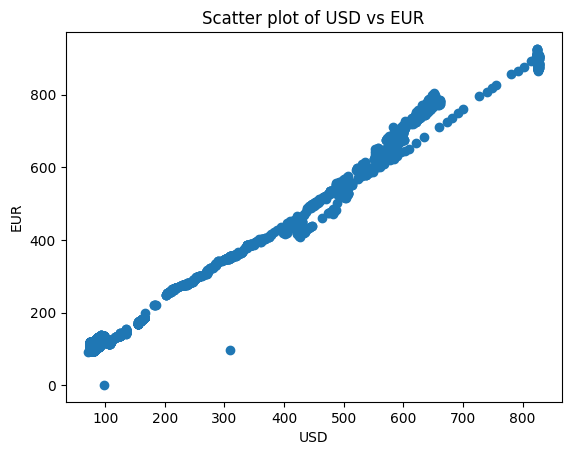

In [64]:

# Create a scatter plot
plt.scatter(usd_eur['USD'], usd_eur['EUR'])
plt.xlabel('USD')
plt.ylabel('EUR')
plt.title('Scatter plot of USD vs EUR')
plt.show()


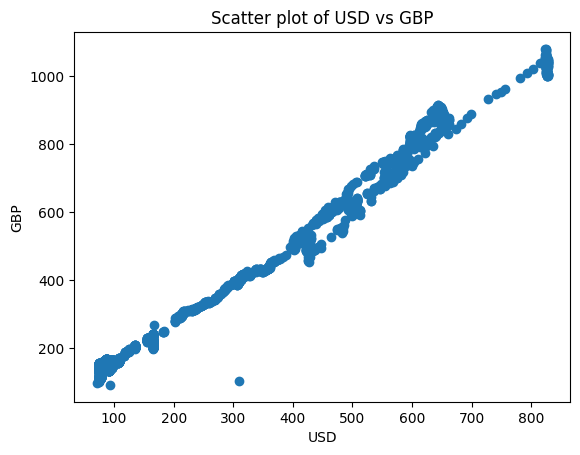

In [73]:
# Create a scatter plot
plt.scatter(usd_eur['USD'], usd_eur['GBP'])
plt.xlabel('USD')
plt.ylabel('GBP')
plt.title('Scatter plot of USD vs GBP')
plt.show()

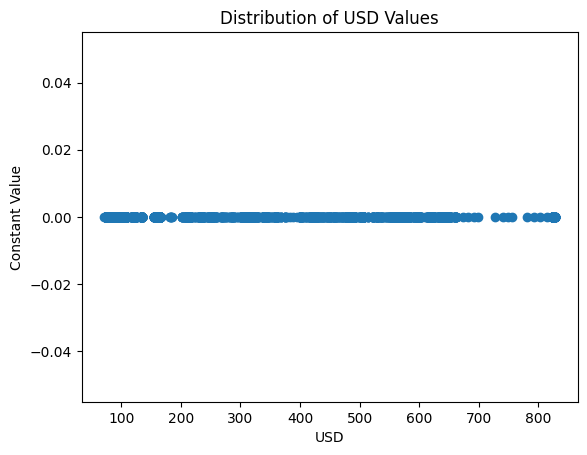

In [83]:
# Assuming 'usd_eur' is your DataFrame with 'USD' column
plt.scatter(usd_eur['USD'], [0] * len(usd_eur['USD']))
plt.xlabel('USD')
plt.ylabel('Constant Value')
plt.title('Distribution of USD Values')
plt.show()

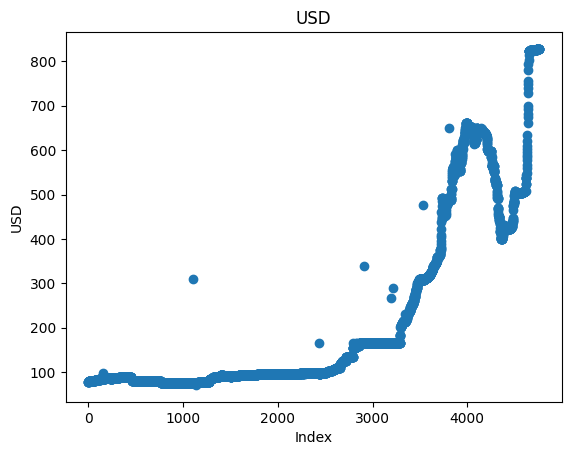

In [87]:
# Plot the data
plt.scatter(usd_eur.index, usd_eur['USD'])  # Using the index for x-axis, USD values for y-axis
plt.title('USD')
plt.xlabel('Index')  # You can replace this with a specific column if you have dates
plt.ylabel('USD')

# Show the plot
plt.show()